Results saved to HT_times_results.csv


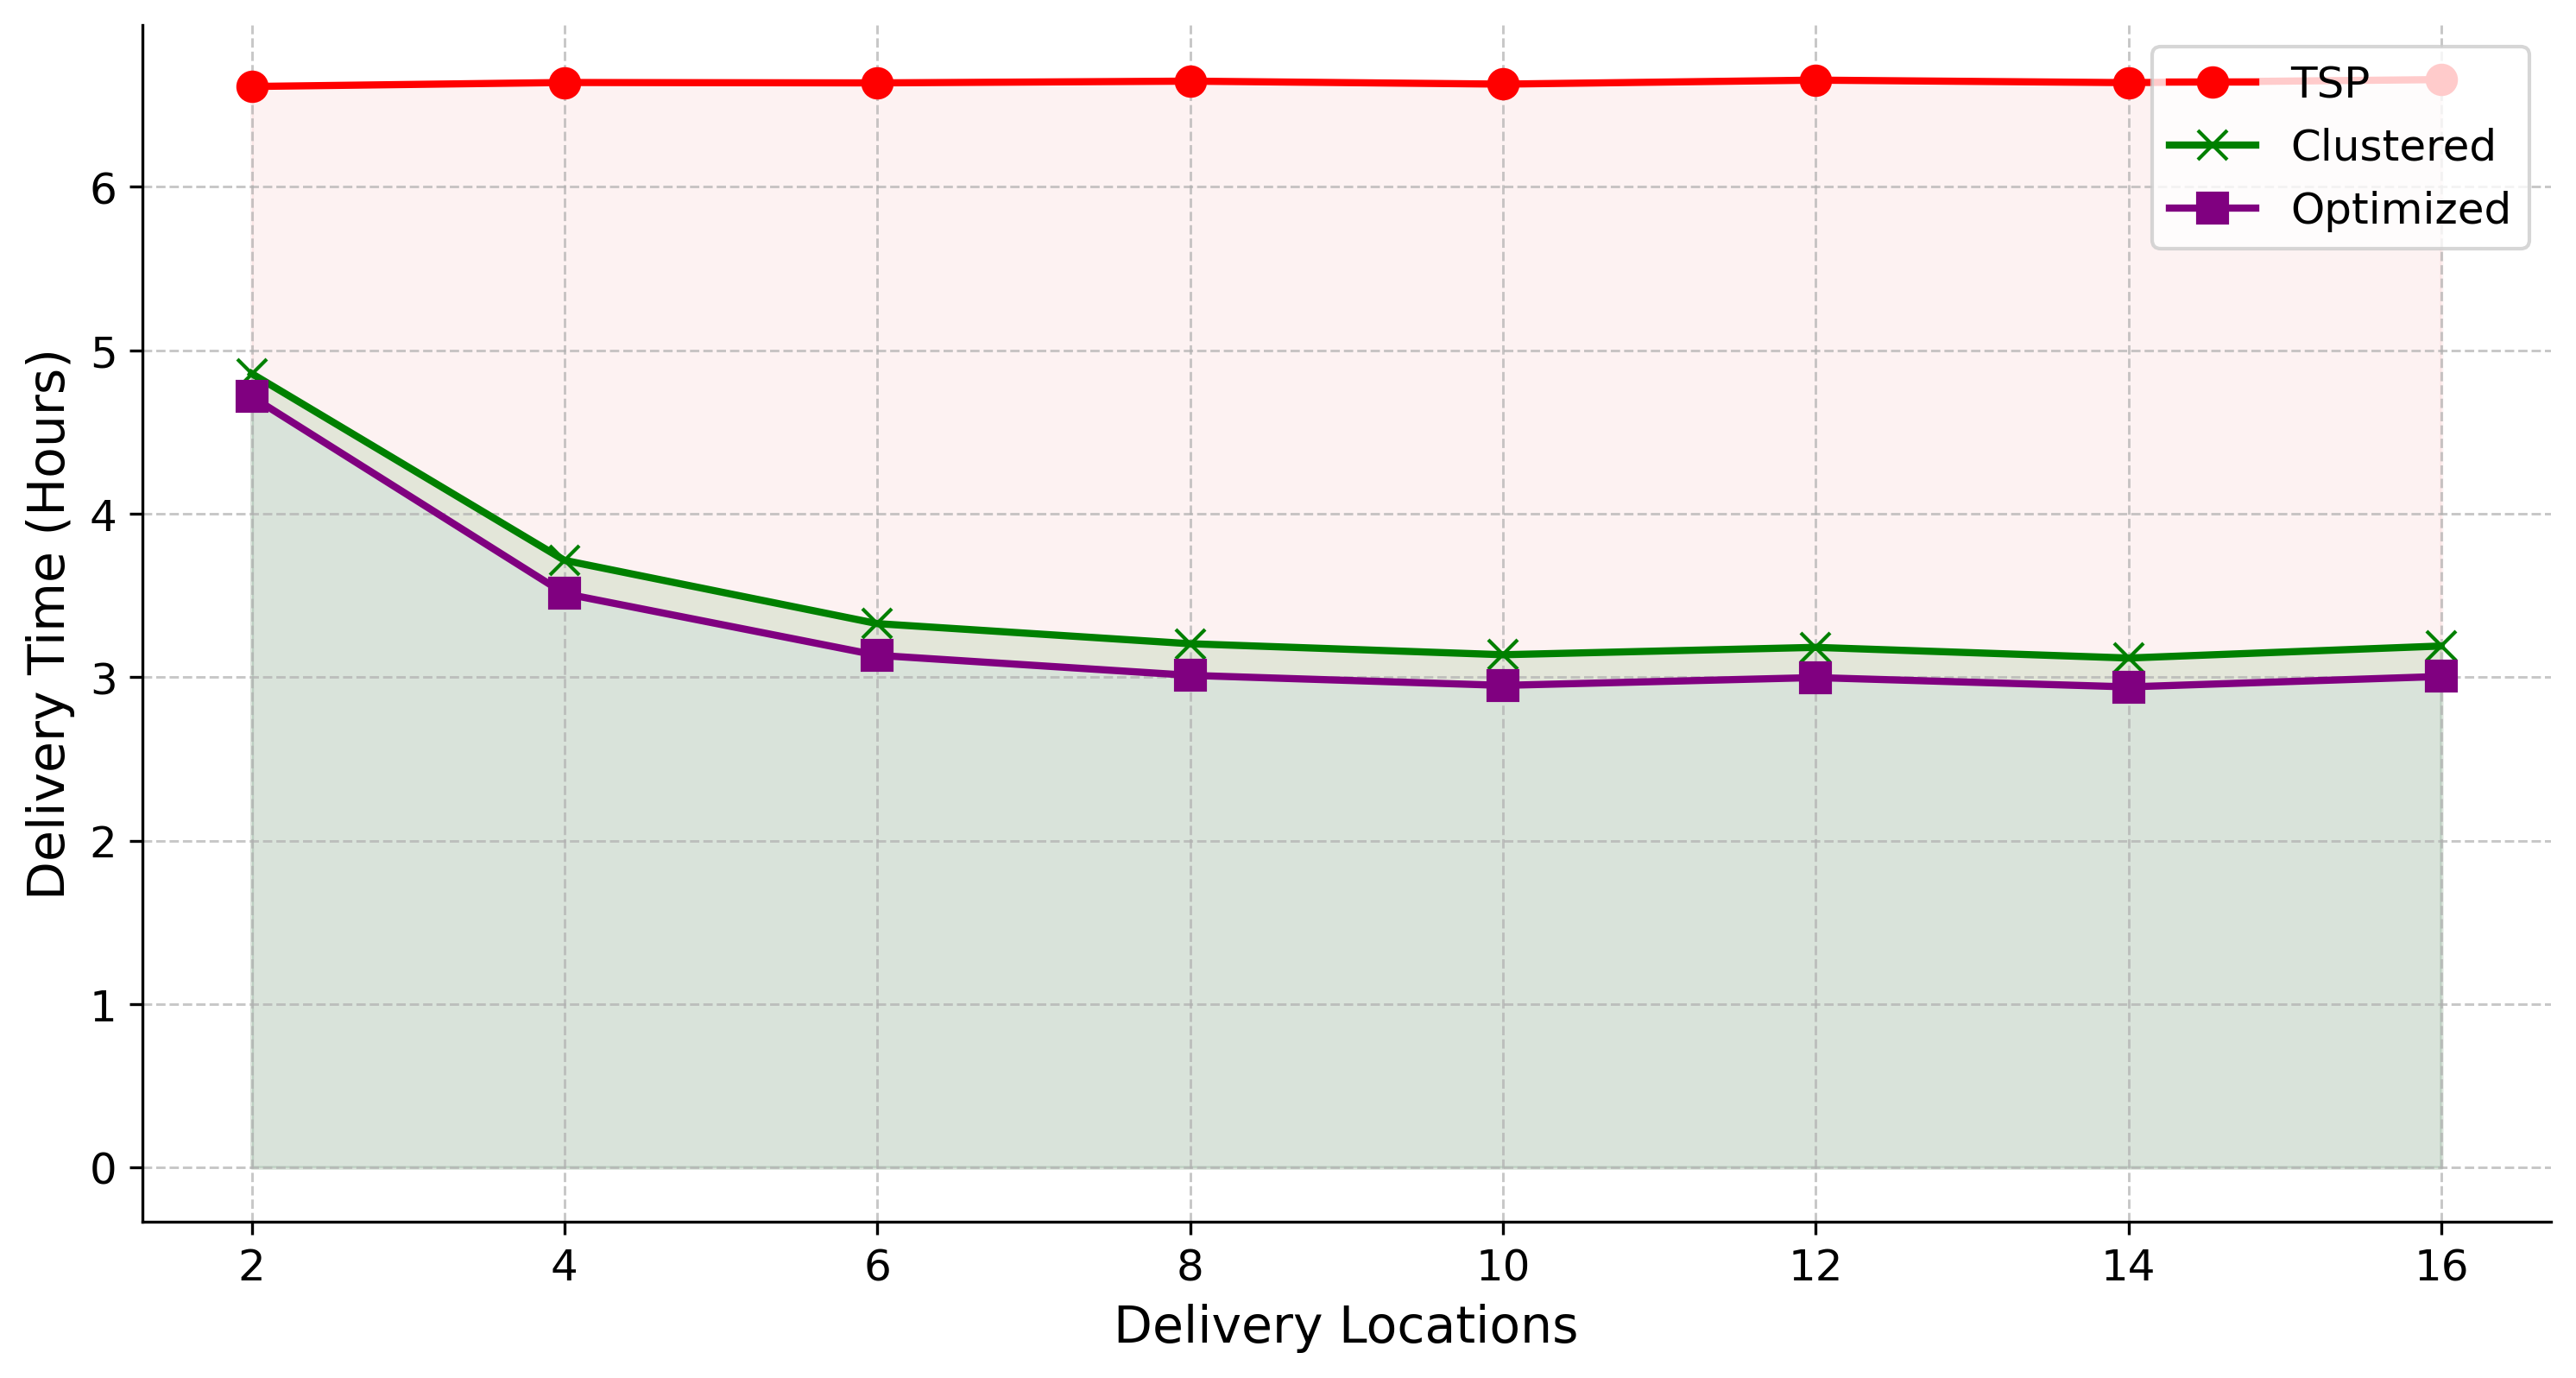

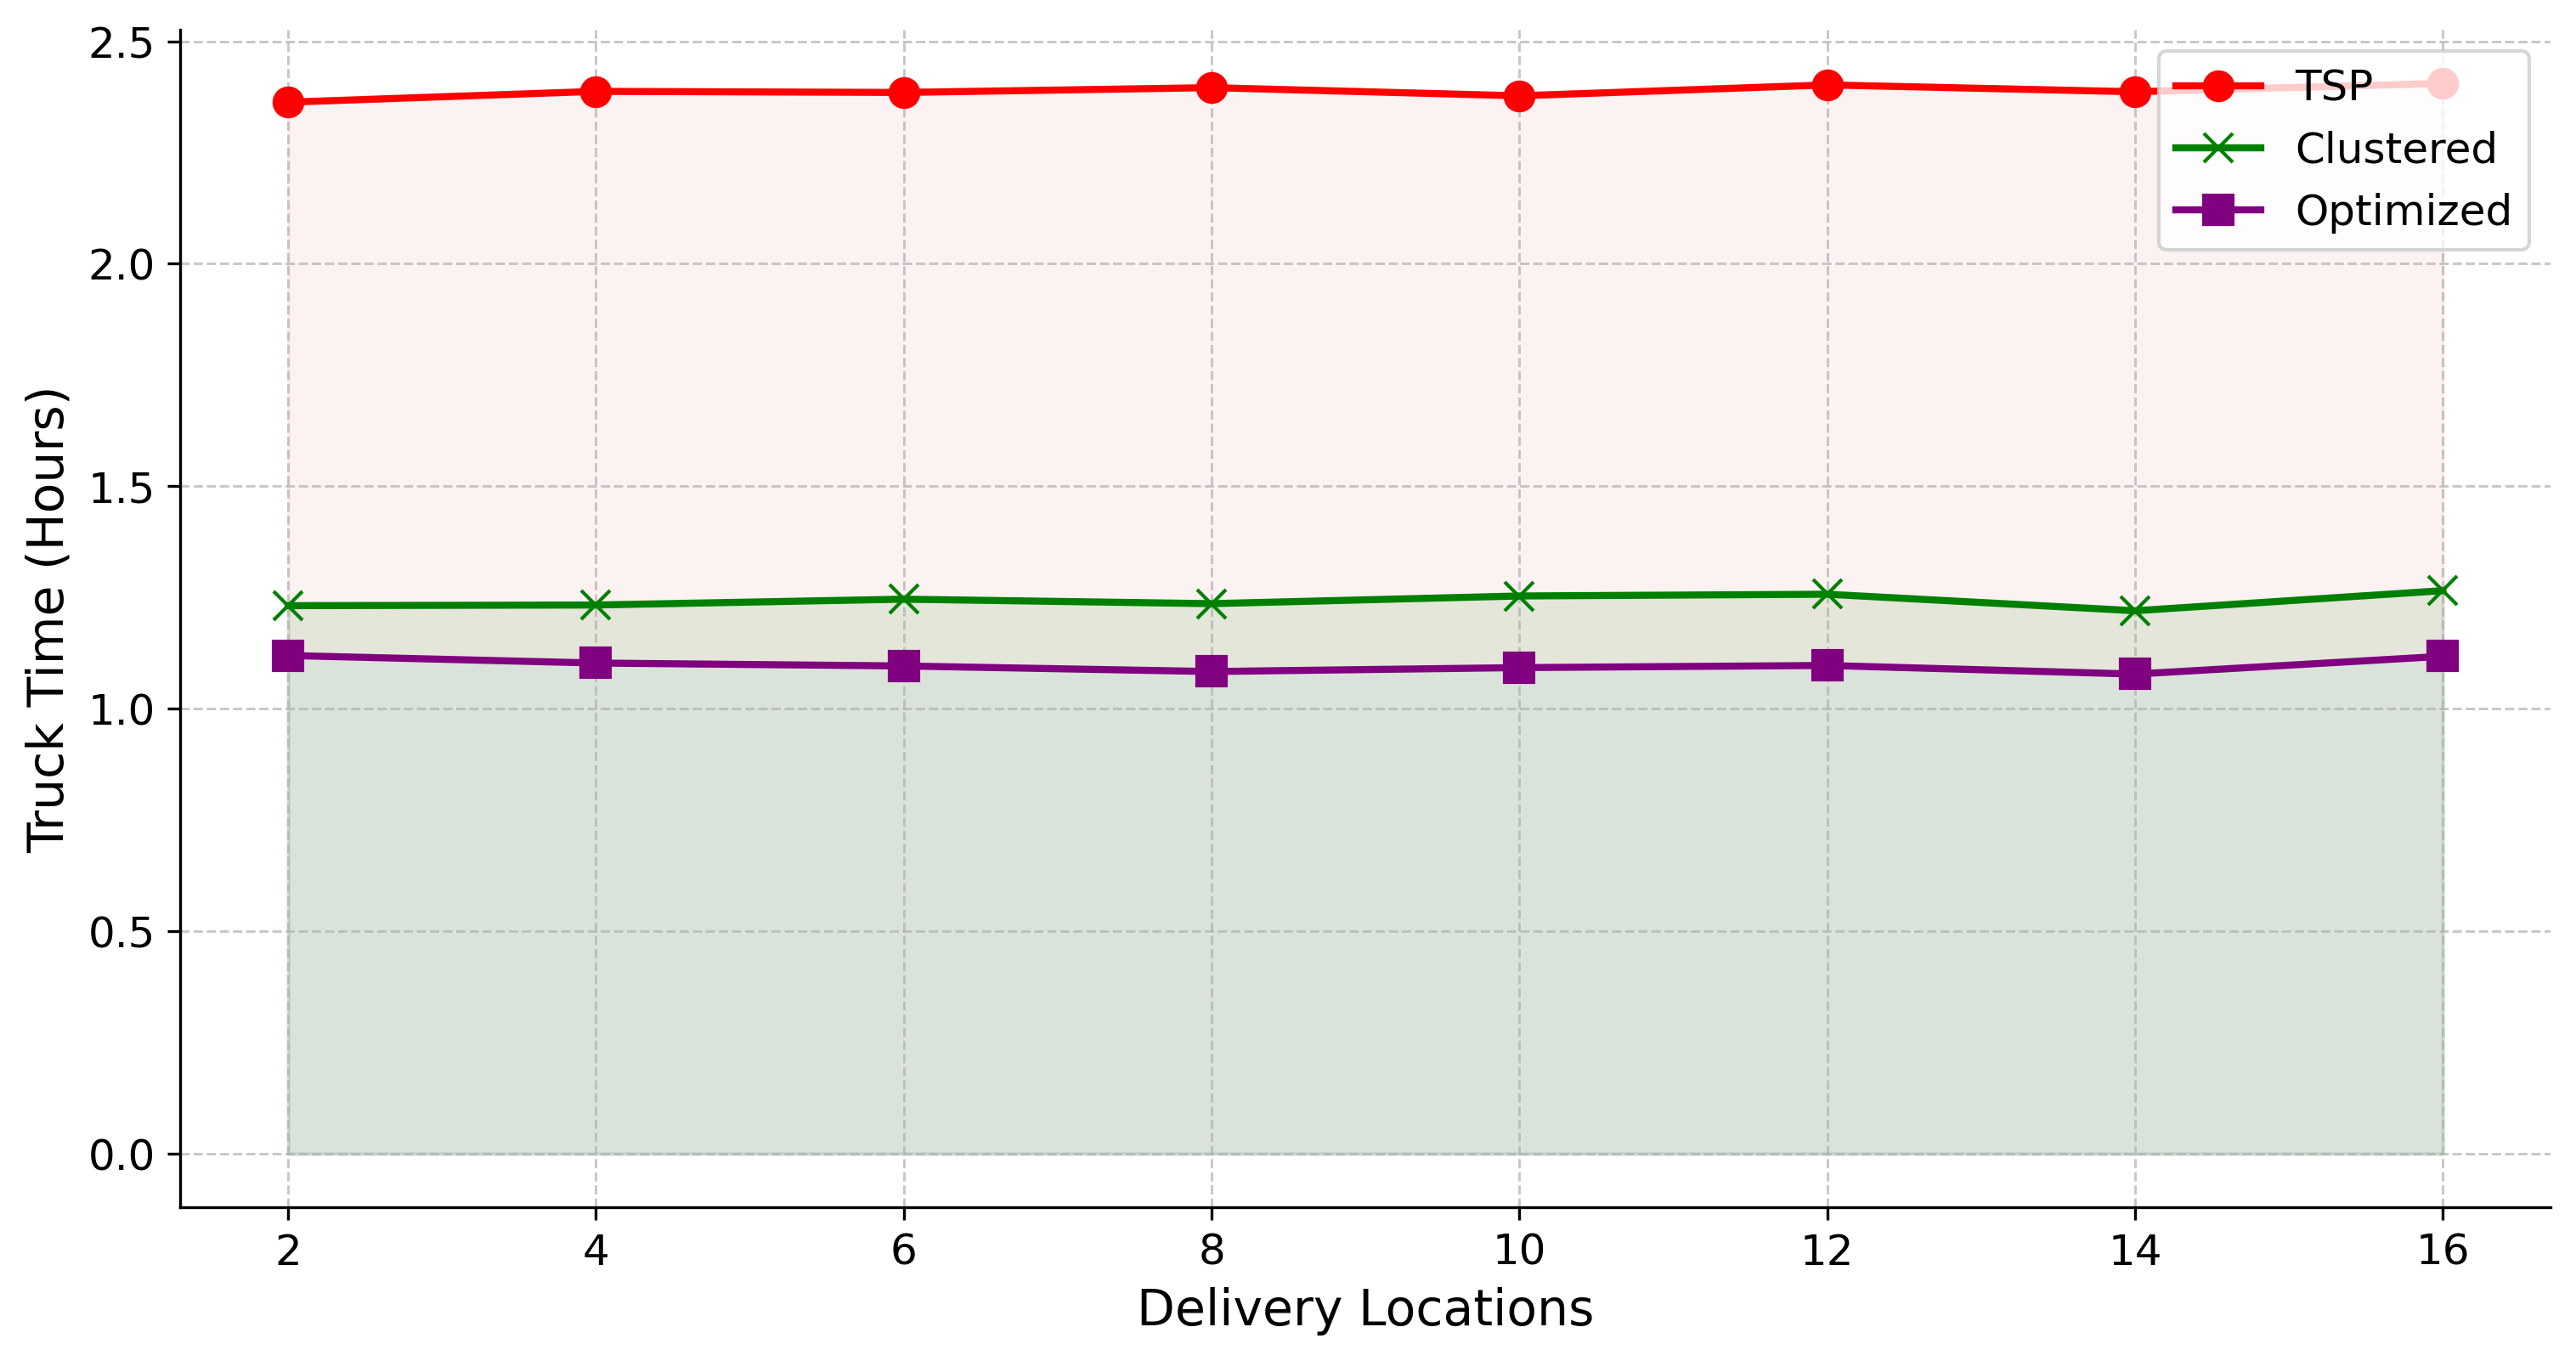

In [5]:
import os
import pandas as pd
import numpy as np  # Import NumPy to handle NaN values
from typing import List
from matplotlib import pyplot as plt

def mean_values(data: pd.DataFrame, column: str) -> float:
    """Calculate the mean value of a specified column in a DataFrame."""
    if column not in data.columns:
        raise KeyError(f"Column '{column}' not found.")
    return data[column].mean()

def load_and_check_file(file_path: str) -> pd.DataFrame:
    """Load a CSV file and perform basic checks."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='ISO-8859-1')

    data.columns = data.columns.str.strip()  # Clean column names
    return data

def load_and_extract_mean(file_path: str, column: str) -> float:
    """Load a CSV file and extract the mean value of a specific column."""
    data = load_and_check_file(file_path)
    return mean_values(data, column)

def replace_none_with_nan(data: List[float]) -> np.ndarray:
    """Replace None values with NaN for safe plotting."""
    return np.array([value if value is not None else np.nan for value in data])

def plot_data(delivery_drones: List[int], tsp: List[float], cluster: List[float], opt: List[float], ylabel: str, title: str, filename: str) -> None:
    """Create a plot for data over different delivery locations."""
    tsp = replace_none_with_nan(tsp)
    cluster = replace_none_with_nan(cluster)
    opt = replace_none_with_nan(opt)

    plt.figure(figsize=(12, 6), dpi=300)

    # Plot the data with appropriate labels
    plt.plot(delivery_drones, tsp, label='TSP', marker='o', markersize=8, linewidth=2, color='red')
    plt.plot(delivery_drones, cluster, label='Clustered', marker='x', markersize=8, linewidth=2, color='green')
    plt.plot(delivery_drones, opt, label='Optimized', marker='s', markersize=8, linewidth=2, color='purple')

    # Fill areas under curves, ignoring NaN values
    plt.fill_between(delivery_drones, tsp, color='lightcoral', alpha=0.1, where=~np.isnan(tsp))
    plt.fill_between(delivery_drones, cluster, color='green', alpha=0.1, where=~np.isnan(cluster))
    plt.fill_between(delivery_drones, opt, color='skyblue', alpha=0.1, where=~np.isnan(opt))

    # Set labels, title, and legend
    plt.xlabel("Delivery Locations", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(delivery_drones, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.legend(fontsize=12)

    # Remove top and right spines for a cleaner look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    #plt.tight_layout()
    plt.show()
    


def main():
    """Main function to load data, process it, and generate plots."""
    delivery_drones = list(range(2, 17, 2))  # Delivery Drones
    file_paths = [f'Output_{drone}.csv' for drone in delivery_drones]

    # Column names for delivery and truck times
    delivery_columns = ['Total_delivery_times_tsp', 'Total_delivery_times_cluster', 'Total_delivery_times_optimize']
    truck_columns = ['Total_truck_times_tsp', 'Total_truck_times_cluster', 'Total_truck_times_optimize']

    # Store results in lists
    delivery_times_tsp, delivery_times_cluster, delivery_times_opt = [], [], []
    truck_times_tsp, truck_times_cluster, truck_times_opt = [], [], []

    # Loop through each file path and extract mean values
    for file in file_paths:
        try:
            # Extract delivery times
            delivery_times_tsp.append(load_and_extract_mean(file, delivery_columns[0]))
            delivery_times_cluster.append(load_and_extract_mean(file, delivery_columns[1]))
            delivery_times_opt.append(load_and_extract_mean(file, delivery_columns[2]))

            # Extract truck times
            truck_times_tsp.append(load_and_extract_mean(file, truck_columns[0]))
            truck_times_cluster.append(load_and_extract_mean(file, truck_columns[1]))
            truck_times_opt.append(load_and_extract_mean(file, truck_columns[2]))

        except (FileNotFoundError, KeyError) as e:
            print(f"Error processing {file}: {e}")
            # Append None values if there's an error
            delivery_times_tsp.append(None)
            delivery_times_cluster.append(None)
            delivery_times_opt.append(None)
            truck_times_tsp.append(None)
            truck_times_cluster.append(None)
            truck_times_opt.append(None)

    # Create DataFrame from the collected results
    df = pd.DataFrame({
        'delivery_drones': delivery_drones,
        'Delivery_times_tsp': delivery_times_tsp,
        'Delivery_times_cluster': delivery_times_cluster,
        'Delivery_times_opt': delivery_times_opt,
        'Truck_times_tsp': truck_times_tsp,
        'Truck_times_cluster': truck_times_cluster,
        'Truck_times_opt': truck_times_opt
    })

    # Save results to CSV
    df.to_csv('HT_times_results.csv', index=False)
    print("Results saved to HT_times_results.csv")

    # Generate plots
    plot_data(
        delivery_drones, delivery_times_tsp, delivery_times_cluster, delivery_times_opt,
        ylabel="Delivery Time (Hours)", title="Comparison of Delivery Times", filename="HT_delivery_times_plot.png"
    )
    plot_data(
        delivery_drones, truck_times_tsp, truck_times_cluster, truck_times_opt,
        ylabel="Truck Time (Hours)", title="Comparison of Truck Times", filename="HT_truck_times_plot.png"
    )

if __name__ == "__main__":
    main()


Results saved to HT_opt_model_results_with_errors.csv


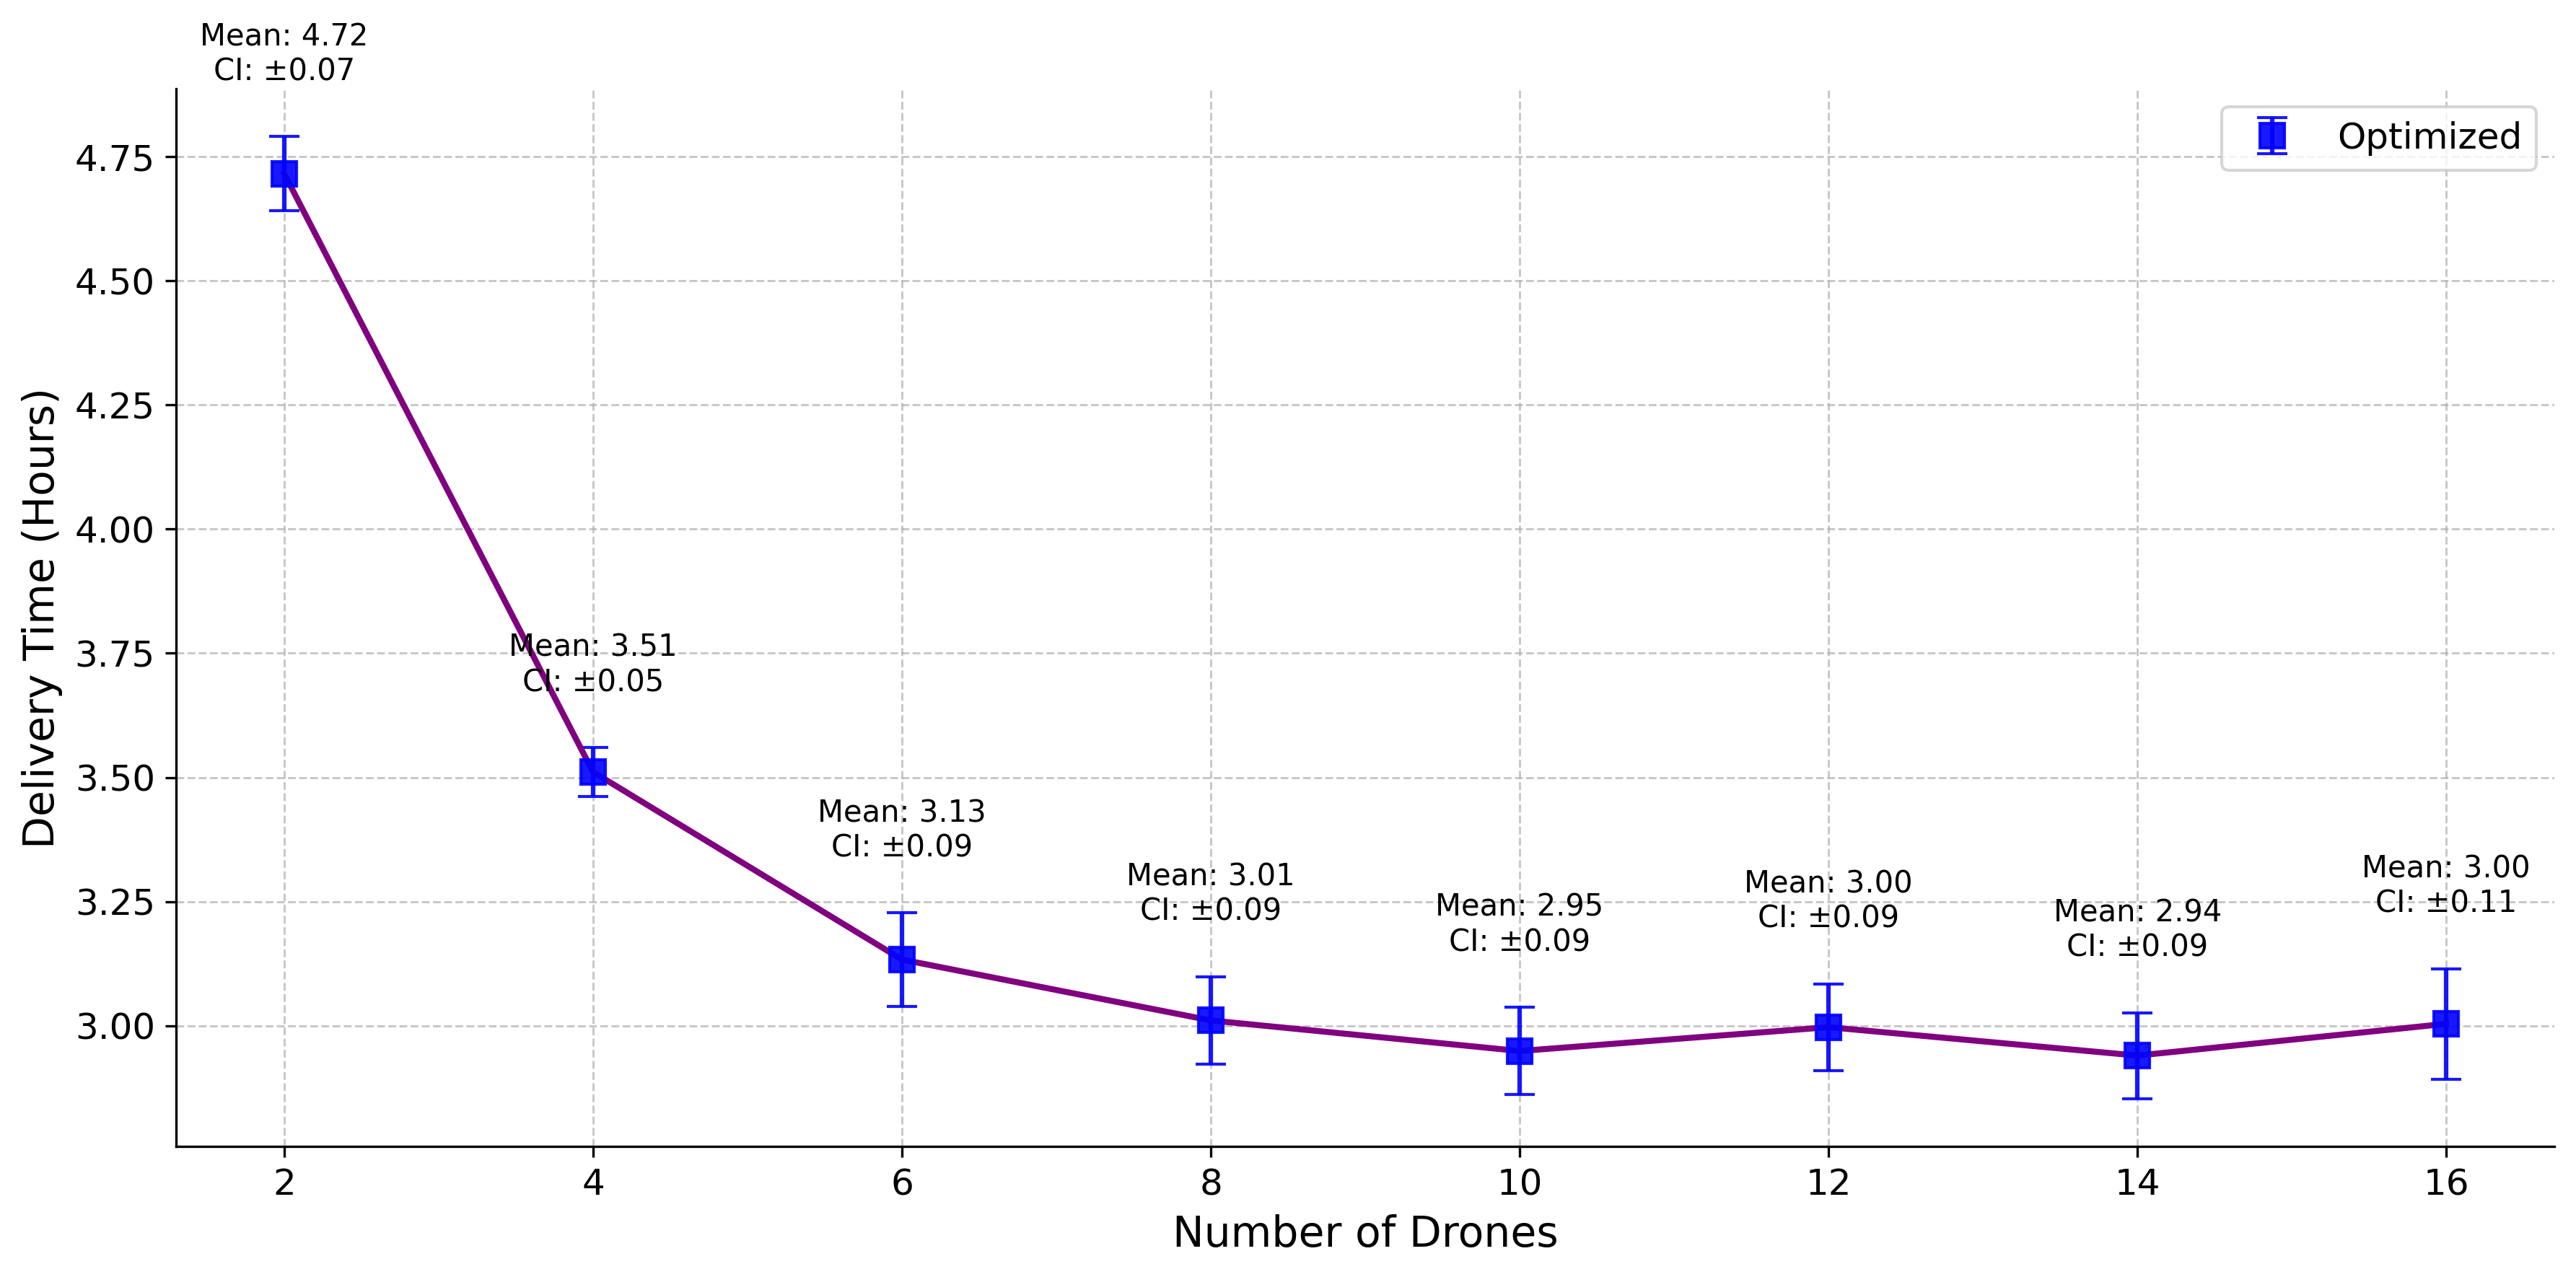

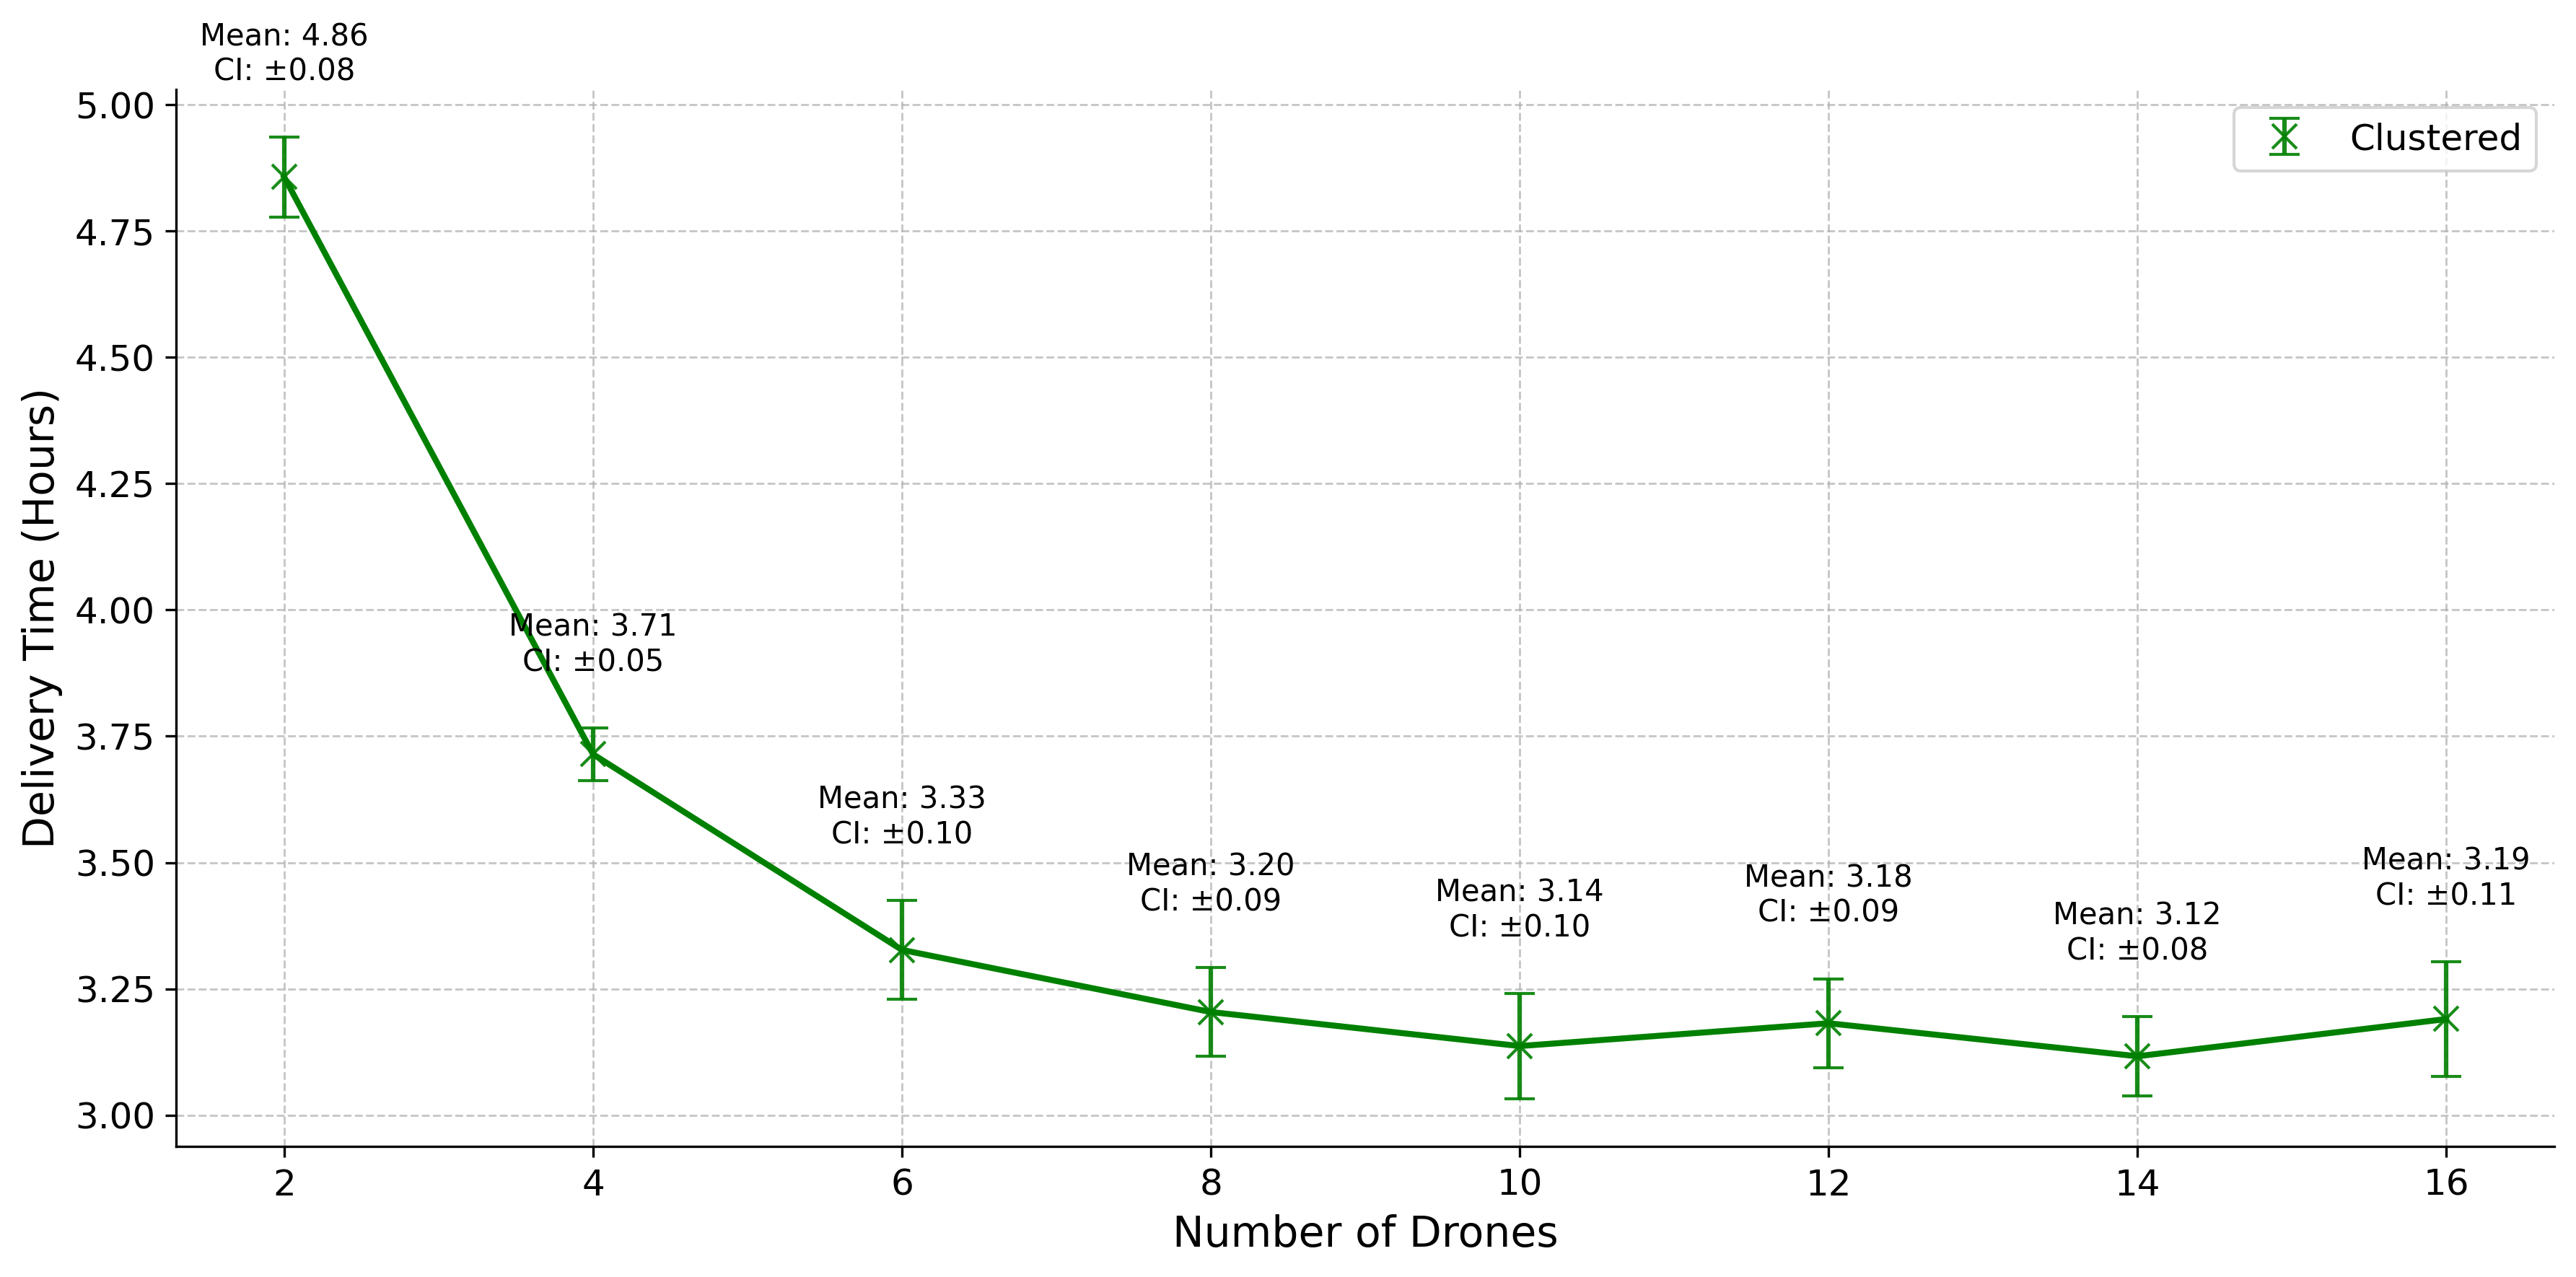

In [6]:
import os
import pandas as pd
import numpy as np  # Import NumPy to handle NaN values
from typing import List
from matplotlib import pyplot as plt
from scipy.stats import sem, t

def confidence_interval(data: List[float], confidence: float = 0.95) -> List[float]:
    """
    Calculate the confidence intervals for the given data.
    """
    data = np.array([value for value in data if value is not None])  # Exclude None values
    n = len(data)
    if n == 0:
        return None  # Return None if there is no data
    mean = np.mean(data)
    margin = sem(data) * t.ppf((1 + confidence) / 2, n - 1)  # Standard error of mean * t-distribution factor
    return mean, margin

def replace_none_with_nan(data: List[float]) -> np.ndarray:
    """Replace None values with NaN for safe plotting."""
    return np.array([value if value is not None else np.nan for value in data])

def plot_opt_model_with_error_bars(
    delivery_drones: List[int], 
    opt: List[float], opt_err: List[float],
    ylabel: str, title: str, filename: str
) -> None:
    """
    Create a plot for the 'Optimized' model with error bars only.
    Annotate the plot with confidence intervals and mean values.
    """
    opt = replace_none_with_nan(opt)
    opt_err = replace_none_with_nan(opt_err)

    plt.figure(figsize=(12, 6), dpi=300)

    # Plot data with error bars for the Optimized model
    plt.errorbar(delivery_drones, opt, yerr=opt_err, label='Optimized', fmt='bs', markersize=8, capsize=5, alpha=0.9)
    
    plt.plot(delivery_drones, opt, linestyle='-', linewidth=2, color='purple')

    # Annotate the plot with mean and confidence interval text
    for x, mean, margin in zip(delivery_drones, opt, opt_err):
        if not np.isnan(mean) and not np.isnan(margin):
            ci_text = f"Mean: {mean:.2f}\nCI: ±{margin:.2f}"
            plt.text(x, mean + margin + 0.1, ci_text, fontsize=10, ha='center', va='bottom', color='black')

    # Set labels, title, and legend
    plt.xlabel("Number of Drones", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(delivery_drones, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.legend(fontsize=12)

    # Remove top and right spines for a cleaner look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

def plot_clustered_model_with_error_bars(
    delivery_drones: List[int],
    cluster: List[float], cluster_err: List[float],
    ylabel: str, title: str, filename: str
) -> None:
    """
    Create a plot for the 'Clustered' model with error bars only.
    Annotate the plot with confidence intervals and mean values.
    """
    cluster = replace_none_with_nan(cluster)
    cluster_err = replace_none_with_nan(cluster_err)

    plt.figure(figsize=(12, 6), dpi=300)

    # Plot data with error bars for the Clustered model
    plt.errorbar(delivery_drones, cluster, yerr=cluster_err, label='Clustered', fmt='gx', markersize=8, capsize=5, alpha=0.9)
    
    plt.plot(delivery_drones, cluster, linestyle='-', linewidth=2, color='green')

    # Annotate the plot with mean and confidence interval text
    for x, mean, margin in zip(delivery_drones, cluster, cluster_err):
        if not np.isnan(mean) and not np.isnan(margin):
            ci_text = f"Mean: {mean:.2f}\nCI: ±{margin:.2f}"
            plt.text(x, mean + margin + 0.1, ci_text, fontsize=10, ha='center', va='bottom', color='black')

    # Set labels, title, and legend
    plt.xlabel("Number of Drones", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(delivery_drones, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.legend(fontsize=12)

    # Remove top and right spines for a cleaner look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()
    

def main():
    """Main function to load data, process it, and generate plot for the Optimized model."""
    delivery_drones = list(range(2, 17, 2))  # Delivery Drones
    file_paths = [f'Output_{drone}.csv' for drone in delivery_drones]

    # Column name for the 'Optimized' model
    delivery_column_opt = 'Total_delivery_times_optimize'

    # Store results in lists
    delivery_times_opt = []
    delivery_times_opt_err = []
    
    delivery_times_cluster = []
    delivery_times_cluster_err = []

    # Loop through each file path and extract mean and error values
    for file in file_paths:
        try:
            # Load data
            data = load_and_check_file(file)

            # Calculate mean and confidence interval for the 'Optimized' model
            opt_data = data[delivery_column_opt].dropna().tolist()
            mean, margin = confidence_interval(opt_data)
            delivery_times_opt.append(mean)
            delivery_times_opt_err.append(margin)
            
            # Calculate mean and confidence interval for the 'Clustered' model
            cluster_data = data['Total_delivery_times_cluster'].dropna().tolist()
            mean, margin = confidence_interval(cluster_data)
            delivery_times_cluster.append(mean)
            delivery_times_cluster_err.append(margin)
            

        except (FileNotFoundError, KeyError) as e:
            print(f"Error processing {file}: {e}")
            # Append None values if there's an error
            delivery_times_opt.append(None)
            delivery_times_opt_err.append(None)
            
            delivery_times_cluster.append(None)
            delivery_times_cluster_err.append(None)

    # Create DataFrame from the collected results
    df = pd.DataFrame({
        'delivery_drones': delivery_drones,
        'Delivery_times_opt': delivery_times_opt,
        'Delivery_times_opt_err': delivery_times_opt_err,
        'Delivery_times_cluster': delivery_times_cluster,
        'Delivery_times_cluster_err': delivery_times_cluster_err
        
    })

    # Save results to CSV
    df.to_csv('HT_opt_model_results_with_errors.csv', index=False)
    print("Results saved to HT_opt_model_results_with_errors.csv")

    # Generate plot with error bars for the 'Optimized' model
    plot_opt_model_with_error_bars(
        delivery_drones, 
        delivery_times_opt, delivery_times_opt_err,
        ylabel="Delivery Time (Hours)", 
        title="Delivery Times for Optimized Model with Error Bars and Confidence Intervals", 
        filename="HT_delivery_times_opt_error_plot.png"
    )
    
    # Generate plot with error bars for the 'Clustered' model
    plot_clustered_model_with_error_bars(
        delivery_drones, 
        delivery_times_cluster, delivery_times_cluster_err,
        ylabel="Delivery Time (Hours)", 
        title="Delivery Times for Clustered Model with Error Bars and Confidence Intervals", 
        filename="HT_delivery_times_cluster_error_plot.png"
    )
    

if __name__ == "__main__":
    main()